In [1]:
# Load Python packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# Load dataset
dataset = sio.loadmat('dataset.mat')

# load train and test sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

# Ensure count of train images and labels match
assert x_train.shape[0] == y_train.shape[0]
# Ensure count of test images and labels match
assert x_test.shape[0] == y_test.shape[0]

# Print number of train and test samples
print(len(x_train))
print(len(x_test))

200
100


In [3]:
# batch size for gradient descent
batch_size = 128
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [4]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

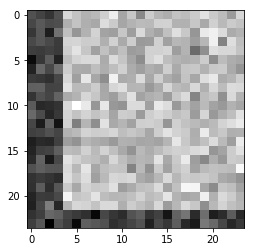

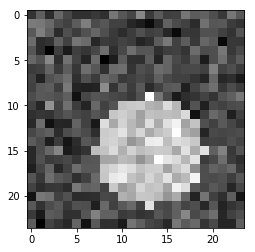

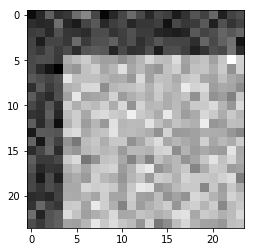

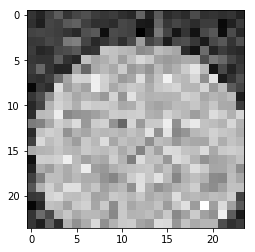

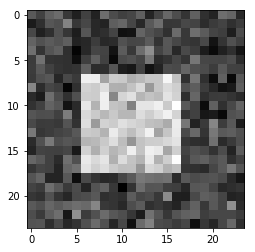

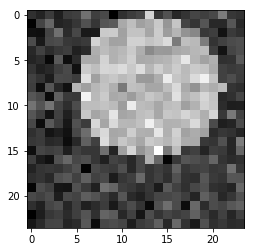

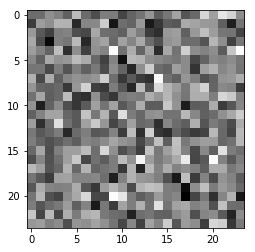

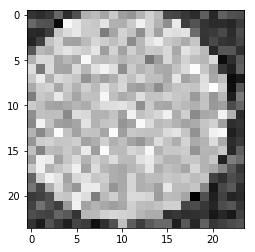

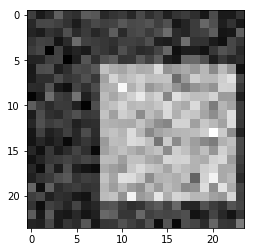

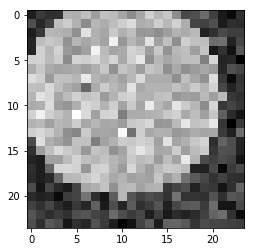

In [5]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [6]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (200, 24, 24, 1)
200 train samples
100 test samples


In [7]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [8]:
# Function that returns the model
def return_model(input_shape, num_classes, x):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(2*x, activation='relu'))
    model.add(Dense(x, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [9]:
# Model with x value 20
model20 = return_model(input_shape, num_classes, 20)
# compile model
model20.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
# Training model with x value 20
history20 = model20.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.6945 - acc: 0.5000 - val_loss: 0.6879 - val_acc: 0.5500
Epoch 2/200
200/200 [==============================] - 0s 556us/step - loss: 0.6879 - acc: 0.5750 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 3/200
200/200 [==============================] - 0s 448us/step - loss: 0.6823 - acc: 0.5500 - val_loss: 0.6805 - val_acc: 0.6000
Epoch 4/200
200/200 [==============================] - 0s 451us/step - loss: 0.6785 - acc: 0.5800 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 5/200
200/200 [==============================] - 0s 466us/step - loss: 0.6881 - acc: 0.5000 - val_loss: 0.6791 - val_acc: 0.6100
Epoch 6/200
200/200 [==============================] - 0s 452us/step - loss: 0.6652 - acc: 0.6350 - val_loss: 0.6803 - val_acc: 0.5400
Epoch 7/200
200/200 [==============================] - 0s 434us/step - loss: 0.6572 - acc: 0.6450 - val_loss: 0.6850 - val_acc: 0.5100
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 475us/step - loss: 0.1957 - acc: 0.9350 - val_loss: 0.4636 - val_acc: 0.8100
Epoch 62/200
200/200 [==============================] - 0s 531us/step - loss: 0.2235 - acc: 0.9200 - val_loss: 0.3032 - val_acc: 0.9100
Epoch 63/200
200/200 [==============================] - 0s 558us/step - loss: 0.1295 - acc: 0.9800 - val_loss: 0.3150 - val_acc: 0.9300
Epoch 64/200
200/200 [==============================] - 0s 453us/step - loss: 0.1188 - acc: 0.9850 - val_loss: 0.2670 - val_acc: 0.9300
Epoch 65/200
200/200 [==============================] - 0s 520us/step - loss: 0.1074 - acc: 0.9800 - val_loss: 0.3295 - val_acc: 0.8500
Epoch 66/200
200/200 [==============================] - 0s 567us/step - loss: 0.1495 - acc: 0.9600 - val_loss: 0.3436 - val_acc: 0.8300
Epoch 67/200
200/200 [==============================] - 0s 440us/step - loss: 0.1334 - acc: 0.9650 - val_loss: 0.2419 - val_acc: 0.9100
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 453us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.2056 - val_acc: 0.9500
Epoch 122/200
200/200 [==============================] - 0s 440us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2060 - val_acc: 0.9500
Epoch 123/200
200/200 [==============================] - 0s 481us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.2030 - val_acc: 0.9500
Epoch 124/200
200/200 [==============================] - 0s 443us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.2029 - val_acc: 0.9500
Epoch 125/200
200/200 [==============================] - 0s 476us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.2031 - val_acc: 0.9500
Epoch 126/200
200/200 [==============================] - 0s 647us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2044 - val_acc: 0.9500
Epoch 127/200
200/200 [==============================] - 0s 499us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.2079 - val_acc: 0.9500
Epoch 128/200
200/200 [==============================] 

In [11]:
# print train and test losses and classification accuracies
score20 = model20.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score20[0])
print('Train accuracy:', score20[1])
score20 = model20.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score20[0])
print('Test accuracy:', score20[1])

Train loss: 0.000267162689124234
Train accuracy: 1.0
Test loss: 0.2186014713719487
Test accuracy: 0.95


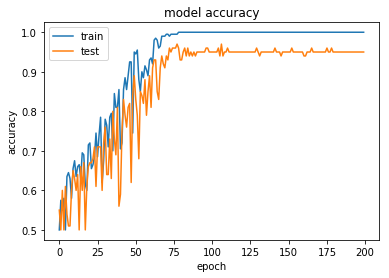

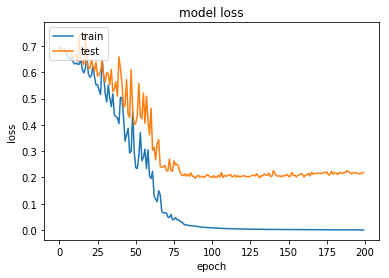

In [12]:
# summarize history for accuracy
plt.plot(history20.history['acc'])
plt.plot(history20.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history20.history['loss'])
plt.plot(history20.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [14]:
# Model with x value 50
model50 = return_model(input_shape, num_classes, 50)
# compile model
model50.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
# Training model with x value 50
history50 = model50.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.7463 - acc: 0.5000 - val_loss: 0.6917 - val_acc: 0.5400
Epoch 2/200
200/200 [==============================] - 0s 476us/step - loss: 0.6913 - acc: 0.5250 - val_loss: 0.6915 - val_acc: 0.5400
Epoch 3/200
200/200 [==============================] - 0s 481us/step - loss: 0.6886 - acc: 0.5250 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 4/200
200/200 [==============================] - 0s 442us/step - loss: 0.6869 - acc: 0.6050 - val_loss: 0.6876 - val_acc: 0.5300
Epoch 5/200
200/200 [==============================] - 0s 448us/step - loss: 0.6848 - acc: 0.5650 - val_loss: 0.6866 - val_acc: 0.6100
Epoch 6/200
200/200 [==============================] - 0s 441us/step - loss: 0.6869 - acc: 0.5600 - val_loss: 0.6899 - val_acc: 0.5100
Epoch 7/200
200/200 [==============================] - 0s 456us/step - loss: 0.6899 - acc: 0.5000 - val_loss: 0.6876 - val_acc: 0.5300
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 427us/step - loss: 0.4385 - acc: 0.8100 - val_loss: 0.5075 - val_acc: 0.6900
Epoch 62/200
200/200 [==============================] - 0s 439us/step - loss: 0.4138 - acc: 0.8250 - val_loss: 0.4397 - val_acc: 0.8000
Epoch 63/200
200/200 [==============================] - 0s 556us/step - loss: 0.3551 - acc: 0.8550 - val_loss: 0.3539 - val_acc: 0.8500
Epoch 64/200
200/200 [==============================] - 0s 489us/step - loss: 0.2966 - acc: 0.8950 - val_loss: 0.4451 - val_acc: 0.7500
Epoch 65/200
200/200 [==============================] - 0s 456us/step - loss: 0.4534 - acc: 0.7550 - val_loss: 0.5055 - val_acc: 0.7400
Epoch 66/200
200/200 [==============================] - 0s 449us/step - loss: 0.4527 - acc: 0.7800 - val_loss: 0.3259 - val_acc: 0.8700
Epoch 67/200
200/200 [==============================] - 0s 465us/step - loss: 0.3023 - acc: 0.8900 - val_loss: 0.3965 - val_acc: 0.8000
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 478us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9300
Epoch 122/200
200/200 [==============================] - 0s 436us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9300
Epoch 123/200
200/200 [==============================] - 0s 454us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.1348 - val_acc: 0.9500
Epoch 124/200
200/200 [==============================] - 0s 443us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.1386 - val_acc: 0.9500
Epoch 125/200
200/200 [==============================] - 0s 472us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.1361 - val_acc: 0.9500
Epoch 126/200
200/200 [==============================] - 0s 441us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.1311 - val_acc: 0.9400
Epoch 127/200
200/200 [==============================] - 0s 544us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.1359 - val_acc: 0.9400
Epoch 128/200
200/200 [==============================] 

Epoch 181/200
200/200 [==============================] - 0s 447us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1858 - val_acc: 0.9200
Epoch 182/200
200/200 [==============================] - 0s 488us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.3417 - val_acc: 0.9000
Epoch 183/200
200/200 [==============================] - 0s 507us/step - loss: 0.0620 - acc: 0.9650 - val_loss: 0.2355 - val_acc: 0.9100
Epoch 184/200
200/200 [==============================] - 0s 474us/step - loss: 0.0431 - acc: 0.9850 - val_loss: 0.1427 - val_acc: 0.9300
Epoch 185/200
200/200 [==============================] - 0s 483us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.1205 - val_acc: 0.9500
Epoch 186/200
200/200 [==============================] - 0s 461us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.1189 - val_acc: 0.9500
Epoch 187/200
200/200 [==============================] - 0s 486us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1185 - val_acc: 0.9500
Epoch 188/200
200/200 [==================

In [16]:
# print train and test losses and classification accuracies
score50 = model50.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score50[0])
print('Train accuracy:', score50[1])
score50 = model50.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score50[0])
print('Test accuracy:', score50[1])

Train loss: 0.0009534743765834719
Train accuracy: 1.0
Test loss: 0.1260349620319903
Test accuracy: 0.95


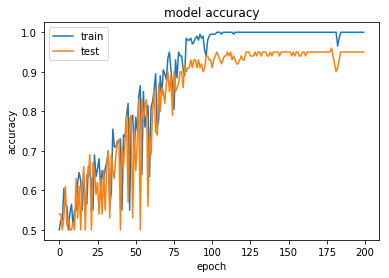

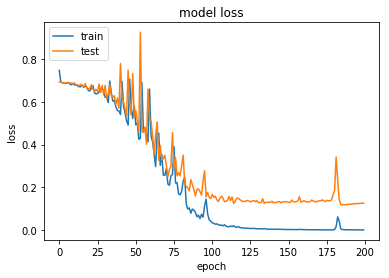

In [17]:
# summarize history for accuracy
plt.plot(history50.history['acc'])
plt.plot(history50.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history50.history['loss'])
plt.plot(history50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++

In [19]:
# Model with x value 100
model100 = return_model(input_shape, num_classes, 100)
# compile model
model100.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
# Training model with x value 100
history100 = model100.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 0.6914 - acc: 0.5050 - val_loss: 0.6912 - val_acc: 0.4900
Epoch 2/200
200/200 [==============================] - 0s 449us/step - loss: 0.6938 - acc: 0.4850 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 3/200
200/200 [==============================] - 0s 556us/step - loss: 0.6881 - acc: 0.5750 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 4/200
200/200 [==============================] - 0s 464us/step - loss: 0.6831 - acc: 0.5750 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 5/200
200/200 [==============================] - 0s 530us/step - loss: 0.6847 - acc: 0.5050 - val_loss: 0.6807 - val_acc: 0.6300
Epoch 6/200
200/200 [==============================] - 0s 465us/step - loss: 0.6757 - acc: 0.6300 - val_loss: 0.6831 - val_acc: 0.5000
Epoch 7/200
200/200 [==============================] - 0s 459us/step - loss: 0.6814 - acc: 0.5150 - val_loss: 0.6783 - val_acc: 0.5400
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 547us/step - loss: 0.0227 - acc: 1.0000 - val_loss: 0.1586 - val_acc: 0.9000
Epoch 62/200
200/200 [==============================] - 0s 496us/step - loss: 0.0208 - acc: 1.0000 - val_loss: 0.1442 - val_acc: 0.9400
Epoch 63/200
200/200 [==============================] - 0s 526us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.1404 - val_acc: 0.9300
Epoch 64/200
200/200 [==============================] - 0s 533us/step - loss: 0.0168 - acc: 1.0000 - val_loss: 0.1469 - val_acc: 0.9200
Epoch 65/200
200/200 [==============================] - 0s 800us/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.1426 - val_acc: 0.9300
Epoch 66/200
200/200 [==============================] - 0s 576us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.1482 - val_acc: 0.9000
Epoch 67/200
200/200 [==============================] - 0s 653us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.1411 - val_acc: 0.9200
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 714us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1236 - val_acc: 0.9300
Epoch 122/200
200/200 [==============================] - 0s 606us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9400
Epoch 123/200
200/200 [==============================] - 0s 683us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1255 - val_acc: 0.9400
Epoch 124/200
200/200 [==============================] - 0s 471us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1208 - val_acc: 0.9400
Epoch 125/200
200/200 [==============================] - 0s 533us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1216 - val_acc: 0.9400
Epoch 126/200
200/200 [==============================] - 0s 560us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1223 - val_acc: 0.9400
Epoch 127/200
200/200 [==============================] - 0s 522us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.1263 - val_acc: 0.9400
Epoch 128/200
200/200 [==============================] 

In [21]:
# print train and test losses and classification accuracies
score100 = model100.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score100[0])
print('Train accuracy:', score100[1])
score100 = model100.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score100[0])
print('Test accuracy:', score100[1])

Train loss: 0.00013961663004010915
Train accuracy: 1.0
Test loss: 0.11618109315633773
Test accuracy: 0.95


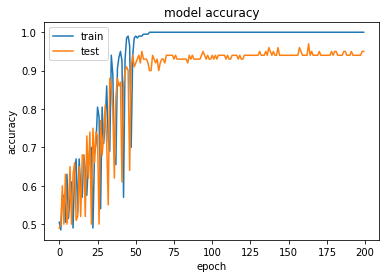

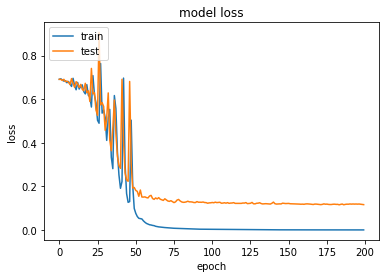

In [22]:
# summarize history for accuracy
plt.plot(history100.history['acc'])
plt.plot(history100.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history100.history['loss'])
plt.plot(history100.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++

In [24]:
# Model built on standard size of hidden layers (120, 84)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [26]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 0.7166 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/200
200/200 [==============================] - 0s 512us/step - loss: 0.6929 - acc: 0.5000 - val_loss: 0.6881 - val_acc: 0.6600
Epoch 3/200
200/200 [==============================] - 0s 642us/step - loss: 0.6874 - acc: 0.6300 - val_loss: 0.6864 - val_acc: 0.5000
Epoch 4/200
200/200 [==============================] - 0s 440us/step - loss: 0.6855 - acc: 0.5400 - val_loss: 0.6835 - val_acc: 0.6700
Epoch 5/200
200/200 [==============================] - 0s 529us/step - loss: 0.6819 - acc: 0.6100 - val_loss: 0.6852 - val_acc: 0.5200
Epoch 6/200
200/200 [==============================] - 0s 548us/step - loss: 0.6820 - acc: 0.5700 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 7/200
200/200 [==============================] - 0s 543us/step - loss: 0.6849 - acc: 0.5300 - val_loss: 0.6777 - val_acc: 0.6600
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 577us/step - loss: 0.2799 - acc: 0.8950 - val_loss: 0.3801 - val_acc: 0.8400
Epoch 62/200
200/200 [==============================] - 0s 578us/step - loss: 0.2375 - acc: 0.9200 - val_loss: 0.3798 - val_acc: 0.8200
Epoch 63/200
200/200 [==============================] - 0s 543us/step - loss: 0.2503 - acc: 0.9200 - val_loss: 0.3538 - val_acc: 0.8500
Epoch 64/200
200/200 [==============================] - 0s 568us/step - loss: 0.2179 - acc: 0.9500 - val_loss: 0.3391 - val_acc: 0.8600
Epoch 65/200
200/200 [==============================] - 0s 623us/step - loss: 0.1882 - acc: 0.9450 - val_loss: 0.2956 - val_acc: 0.8700
Epoch 66/200
200/200 [==============================] - 0s 639us/step - loss: 0.1702 - acc: 0.9550 - val_loss: 0.2683 - val_acc: 0.8900
Epoch 67/200
200/200 [==============================] - 0s 526us/step - loss: 0.1483 - acc: 0.9600 - val_loss: 0.2681 - val_acc: 0.8900
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 472us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0942 - val_acc: 0.9600
Epoch 122/200
200/200 [==============================] - 0s 588us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0929 - val_acc: 0.9500
Epoch 123/200
200/200 [==============================] - 0s 633us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0944 - val_acc: 0.9800
Epoch 124/200
200/200 [==============================] - 0s 619us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0894 - val_acc: 0.9700
Epoch 125/200
200/200 [==============================] - 0s 489us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0914 - val_acc: 0.9600
Epoch 126/200
200/200 [==============================] - 0s 459us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0930 - val_acc: 0.9700
Epoch 127/200
200/200 [==============================] - 0s 509us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0940 - val_acc: 0.9700
Epoch 128/200
200/200 [==============================] 

In [27]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.00025659485079813747
Train accuracy: 1.0
Test loss: 0.08449145160615444
Test accuracy: 0.96


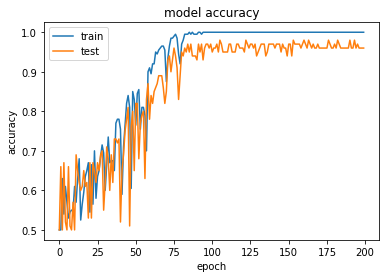

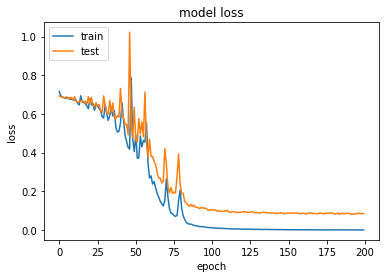

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()